<a href="https://colab.research.google.com/github/rsbaye/Data-Science-Projects/blob/main/BIA_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
# Define parameters
population_size = 1000000  # Total eligible population 1 million
prevalence_rate = 0.1  # 10% of population has the condition
incidence_rate = 0.02  # 2% annual incidence
uptake_rate = [0.1, 0.2, 0.25, 0.5, 0.55, 0.7, 0.9, 0.8]  # Uptake rates over 8 years
drug_cost_per_patient = 4500  # Annual cost of the new drug per patient
current_treatment_cost_per_patient = 3000  # Annual cost of current treatments per patient
cost_offset_per_patient = 1000  # Savings due to reduced complications/hospitalizations

# Time horizon
time_horizon = len(uptake_rate)

# Initialize results storage
results = []

# Calculate budget impact over time horizon
for year in range(time_horizon):
    # Calculate eligible population for each year
    prevalent_cases = population_size * prevalence_rate
    incident_cases = population_size * incidence_rate * (year + 1)
    total_cases = prevalent_cases + incident_cases

    # Patients treated with the new drug and current treatments
    patients_on_new_drug = total_cases * uptake_rate[year]
    patients_on_current_treatment = total_cases - patients_on_new_drug

    # Calculate costs for each scenario
    cost_new_drug_scenario = (
        patients_on_new_drug * drug_cost_per_patient +
        patients_on_current_treatment * current_treatment_cost_per_patient -
        patients_on_new_drug * cost_offset_per_patient
    )

    cost_reference_scenario = total_cases * current_treatment_cost_per_patient

    incremental_budget_impact = cost_new_drug_scenario - cost_reference_scenario

    # Store results
    results.append({
        "Year": year + 1,
        "Prevalent Cases": prevalent_cases,
        "Incident Cases": incident_cases,
        "Total Cases": total_cases,
        "Patients on New Drug": patients_on_new_drug,
        "Patients on Current Treatment": patients_on_current_treatment,
        "Cost (New Drug Scenario)": cost_new_drug_scenario,
        "Cost (Reference Scenario)": cost_reference_scenario,
        "Incremental Budget Impact": incremental_budget_impact
    })

# Convert results to DataFrame for analysis and visualization
results_df = pd.DataFrame(results)

# Display results
print(results_df)



   Year  Prevalent Cases  Incident Cases  Total Cases  Patients on New Drug  \
0     1         100000.0         20000.0     120000.0               12000.0   
1     2         100000.0         40000.0     140000.0               28000.0   
2     3         100000.0         60000.0     160000.0               40000.0   
3     4         100000.0         80000.0     180000.0               90000.0   
4     5         100000.0        100000.0     200000.0              110000.0   
5     6         100000.0        120000.0     220000.0              154000.0   
6     7         100000.0        140000.0     240000.0              216000.0   
7     8         100000.0        160000.0     260000.0              208000.0   

   Patients on Current Treatment  Cost (New Drug Scenario)  \
0                       108000.0               366000000.0   
1                       112000.0               434000000.0   
2                       120000.0               500000000.0   
3                        90000.0        

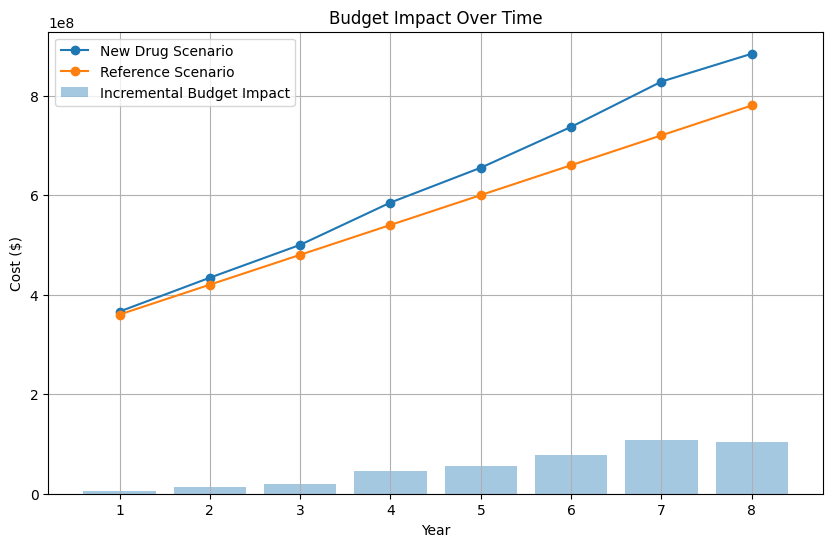

In [8]:


plt.figure(figsize=(10, 6))
plt.plot(results_df["Year"], results_df["Cost (New Drug Scenario)"], label="New Drug Scenario", marker='o')
plt.plot(results_df["Year"], results_df["Cost (Reference Scenario)"], label="Reference Scenario", marker='o')
plt.bar(results_df["Year"], results_df["Incremental Budget Impact"], alpha=0.4, label="Incremental Budget Impact")
plt.title("Budget Impact Over Time")
plt.xlabel("Year")
plt.ylabel("Cost ($)")
plt.legend()
plt.grid(True)
plt.show()
